<a href="https://colab.research.google.com/github/uday2510/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Cardiovascular_Risk_Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Uday Naidu


# **Project Summary -**

Title: Predicting Cardiovascular Risk using Machine Learning: A Step Towards Personalized Healthcare

Summary:

Our Cardiovascular Risk Prediction ML project aimed to develop a robust and accurate predictive model to assess the risk of cardiovascular diseases (CVDs) in individuals, paving the way for more effective preventive strategies and personalized healthcare interventions. Cardiovascular diseases remain a significant global health concern, and early identification of high-risk patients is crucial to mitigate their impact and improve overall patient outcomes.

The project began with an extensive exploration of diverse datasets containing a wealth of health parameters, lifestyle factors, and medical histories of a large cohort of patients. Careful data preprocessing techniques were employed to handle missing values, standardize features, and eliminate noise, ensuring the dataset's integrity and suitability for model training.

Three machine learning algorithms were chosen as potential models for cardiovascular risk prediction: Logistic Regression, Random Forest, and XGBoost. Each algorithm brought unique strengths to the table, enabling a comprehensive evaluation of their capabilities in handling this complex healthcare challenge.

To optimize the performance of each model, hyperparameter tuning was conducted using techniques such as Grid Search and Randomized Search. These tuning processes allowed us to fine-tune model parameters, enhancing their predictive potential and increasing their sensitivity to critical risk factors.

The outcomes of the project unveiled valuable insights into each model's performance and their ability to identify patients at risk of CVDs. The Logistic Regression model, known for its simplicity, demonstrated moderate accuracy, yielding approximately 70% correct predictions. After hyperparameter tuning, a marginal increase in accuracy was observed, indicating that this model might be more suitable for simpler datasets or when interpretability is essential.

In contrast, the Random Forest algorithm emerged as the most powerful model for cardiovascular risk prediction, achieving an impressive accuracy of 90.85%. This ensemble learning technique combines the predictions of multiple decision trees, effectively mitigating overfitting and demonstrating superior performance in handling complex and non-linear relationships within the data. After hyperparameter tuning, the Random Forest model exhibited its potential to identify high-risk patients accurately and reliably.

Moreover, the XGBoost algorithm, known for its efficiency and parallelization capabilities, performed commendably in predicting cardiovascular risk. With an accuracy close to the Random Forest model, XGBoost proved to be a valuable addition to our toolkit, demonstrating its efficacy in capturing intricate patterns within the data and providing a well-rounded approach to cardiovascular risk assessment.

The success of the Random Forest classifier offers immense promise for healthcare professionals and policymakers. With early identification of high-risk patients, healthcare providers can implement proactive interventions and targeted treatment plans, leading to improved patient outcomes and cost-effective healthcare management. Additionally, the insights gained from the other models contribute to our understanding of the dataset, offering potential areas for further exploration and research.

As we reflect on the completion of our Cardiovascular Risk Prediction ML project, we recognize the tremendous potential of machine learning in revolutionizing healthcare practices. By harnessing the power of predictive modeling, we have taken a significant stride towards personalized and proactive healthcare, empowering medical professionals with the tools they need to deliver patient-centric care.

However, our work does not end here. Moving forward, we envision further enhancements to our predictive model, including the integration of new data sources and advanced feature engineering techniques. Our ultimate goal remains to continuously refine and improve our predictive capabilities, striving towards a future where cardiovascular risk prediction is seamlessly integrated into routine medical assessments, ensuring a healthier and more secure future for patients worldwide.

# **GitHub Link -**

https://github.com/uday2510/Cardiovascular-Risk-Prediction

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [70]:
# Import Libraries
import pandas as pd                                                                                                                 #Library for pandas
import numpy as np                                                                                                                  #Library for Numpy
from datetime import datetime                                                                                                       #Datetime library
import matplotlib.pyplot as plt                                                                                                     #Library for Visualization from matplotlib
import seaborn as sns                                                                                                               #Library for seaborn visualization
from sklearn.preprocessing import StandardScaler                                                                                    #Library for feature scaling
from sklearn.model_selection import train_test_split                                                                                #Library for splitting the dataset
from sklearn.linear_model import LogisticRegression                                                                                 #Library for  ML Model
from sklearn.metrics import mean_absolute_error ,r2_score, mean_squared_error                                                       #Library for  checking accuracy and evaluation
from sklearn.model_selection import GridSearchCV                                                                                    #Library for hyperparamter tuning
from sklearn.linear_model import Ridge                                                                                              #Library for regularizaton
from sklearn.neighbors import LocalOutlierFactor                                                                                    #Library for outlier detection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder                                                                       #Library for Categorical encoding
from imblearn.combine import SMOTETomek                                                                                             #Library for handling imbalance dataset
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report                                     #Library for  checking accuracy
from xgboost import XGBClassifier                                                                                                   #Library for  ML Model
import warnings


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
path='/content/drive/MyDrive/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

### Dataset First View

In [71]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

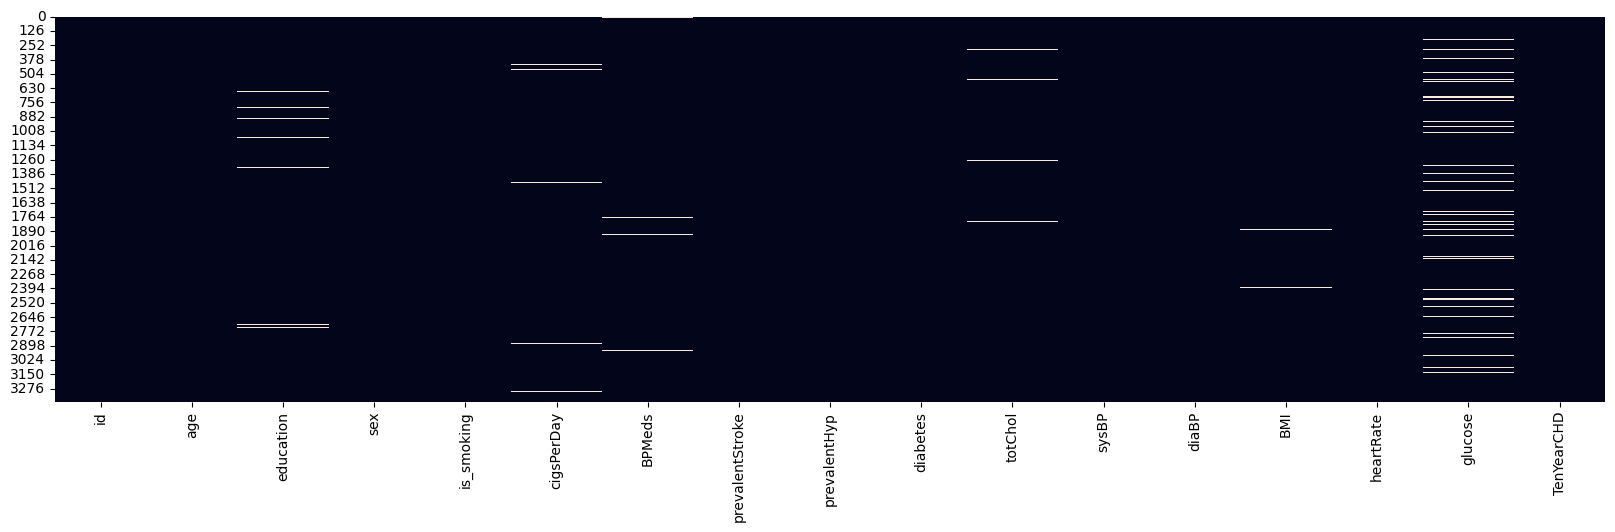

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False, cmap='rocket')

### What did you know about your dataset?

**This dataset consist of 3390 rows & 17 columns, which has no duplicated values but has null value in 7 features i.e (education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose).**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values=df.nunique().reset_index()
unique_values

,index,0
0,id,3390
1,age,39
2,education,4
3,sex,2
4,is_smoking,2
5,cigsPerDay,32
6,BPMeds,2
7,prevalentStroke,2
8,prevalentHyp,2
9,diabetes,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Dropping nan values
df1=df.dropna().reset_index()
print(df1.shape)
print(df.shape)

(2927, 18)
(3390, 17)


In [ ]:
df1.drop(['id'],inplace=True,axis=1)

In [ ]:
df1.columns

Index(['index', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### What all manipulations have you done and insights you found?

**Since the null values were very less so i dropped the nan values from the entire data set  and stored in in a new variable.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
df1['prevalentStroke'].value_counts()

0    2909
1      18
Name: prevalentStroke, dtype: int64

Text(0, 0.5, 'heartRate')

<Figure size 1800x1000 with 0 Axes>

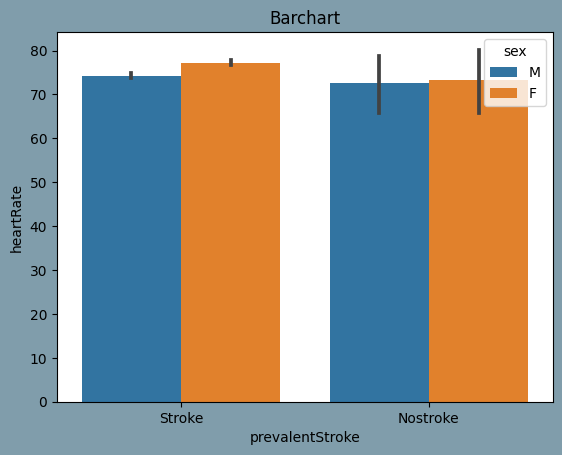

In [68]:
plt.figure(figsize=(18,10))
plt.figure(facecolor='#809dab')
sns.barplot(data=df1, x=df1['prevalentStroke'], y=df1['heartRate'],hue='sex')
plt.xticks(ticks=[0, 1], labels=['Stroke', 'Nostroke'])
plt.title('Barchart')
plt.xlabel('prevalentStroke')
plt.ylabel('heartRate')


##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between prevalentStroke variable and heart rate  taking hue as sex**

##### 2. What is/are the insight(s) found from the chart?

**I have found that both the males and female having heartstroke are more as compared to males and female with no stroke taking heartrate on y axis which is almost 75 for male with heartstroke and 78 for female with heartstroke**

#### Chart - 2

Text(0, 0.5, 'features')

<Figure size 1800x1000 with 0 Axes>

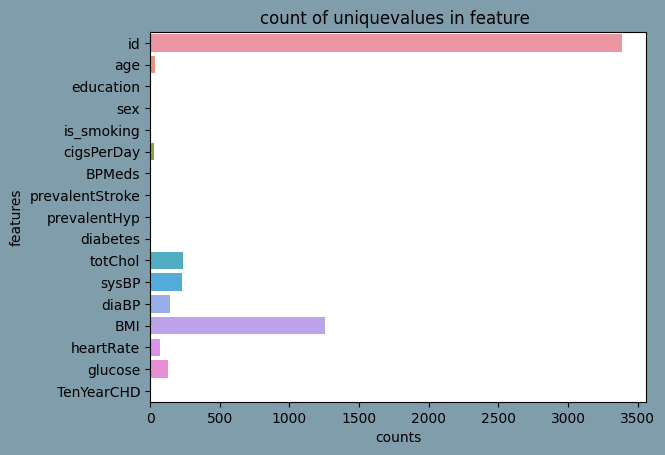

In [ ]:
#visualizing unique values of each feature
plt.figure(figsize=(18,10))
plt.figure(facecolor='#809dab')
sns.barplot(data=unique_values, x=0,y='index')
plt.title('count of uniquevalues in feature ')
plt.xlabel('counts')
plt.ylabel('features')

##### 1. Why did you pick the specific chart?

**I have used this chart to visualize the no of unique values present in each feature**

##### 2. What is/are the insight(s) found from the chart?

**I have found that BMI column has the most no of unique value ,where as expect BMI other columns like glucose ,heartrate,diaBP,ysBP,totalChol and age hase very less number of unique value**

#### Chart - 3

Text(0.5, 1.0, 'Distribution of TenYearCHD')

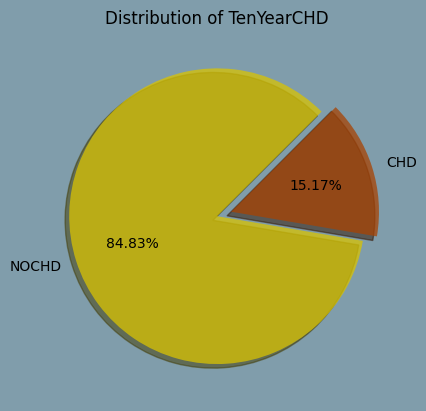

In [73]:
x=df1['TenYearCHD'].value_counts()
label=['NOCHD','CHD']
plt.figure(facecolor='#809dab')
plt.pie(x.values, labels= label, autopct='%1.2f%%',startangle=45,colors=['#d9c302','#a84303'],shadow=True,explode=(0,0.1),wedgeprops={'alpha':0.75})
plt.title('Distribution of TenYearCHD')

##### 1. Why did you pick the specific chart?

**I did use this pie chart for visualise the distribution of target variable**

##### 2. What is/are the insight(s) found from the chart?

**The insights i found is that the taret feature is highly imbalanced which would affect the ml model to predict as the model will give baised output due to the imbalanced dataset**

#### Chart - 4

In [ ]:
df1['is_smoking'].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

Text(0.5, 1.0, 'Distribution smokers')

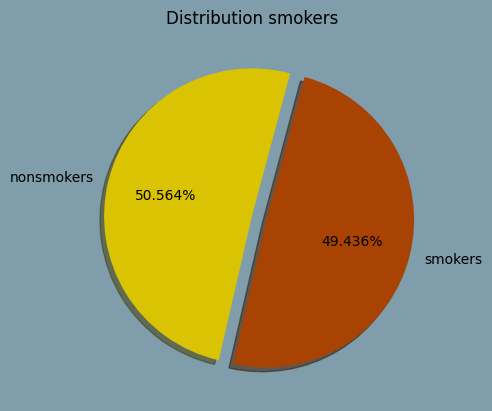

In [72]:
# Chart - 4 visualization code
df1['is_smoking'].value_counts()
plt.figure(facecolor='#809dab')
labels=['nonsmokers','smokers']
plt.pie(df1['is_smoking'].value_counts().values, labels=labels, autopct='%1.3f%%', startangle=75,colors=['#d9c302','#a84303'],shadow=True,explode=(0,0.1))
plt.title('Distribution smokers')

##### 1. Why did you pick the specific chart?

**I did use this pie chart to visualise the distribution of smokers and nonsmokers**

##### 2. What is/are the insight(s) found from the chart?

**I can visulize that 50.64 % people are non smokers where as 49.436 people are smokers**

#### Chart - 5

In [ ]:
df1['TenYearCHD'].value_counts().index

Int64Index([0, 1], dtype='int64')

Text(0, 0.5, 'totChol')

<Figure size 1800x500 with 0 Axes>

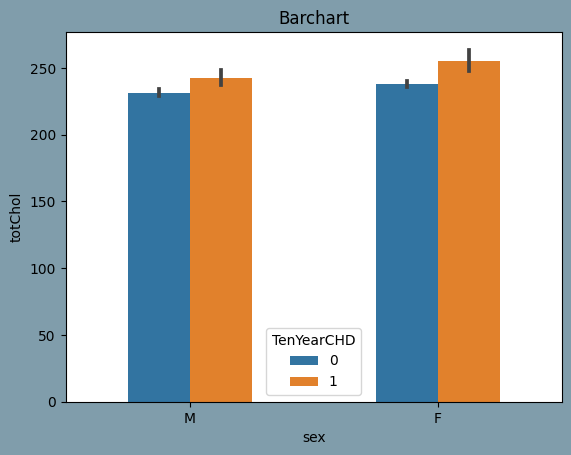

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(18,5))
plt.figure(facecolor='#809dab')
sns.barplot(data=df1 , x='sex' , y='totChol',hue='TenYearCHD',width= 0.5)
plt.title('Barchart')
plt.xlabel('sex')
plt.ylabel('totChol')

##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between totchol variable and target variable taking hue as sex**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found in this chart is that the males and females having total cholestrol level more then 230 has the risk of CHD**

#### Chart - 6

Text(0, 0.5, 'Bloodpressure')

<Figure size 1800x500 with 0 Axes>

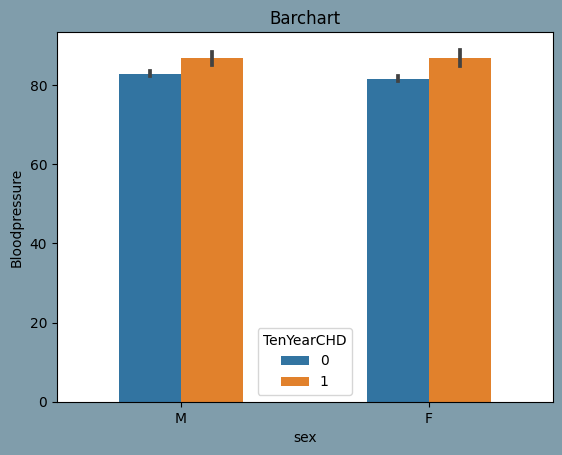

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(18,5))
plt.figure(facecolor='#809dab')
sns.barplot(data=df1 , x='sex' , y='diaBP',hue='TenYearCHD',width= 0.5)
plt.title('Barchart')
plt.xlabel('sex')
plt.ylabel('Bloodpressure')

##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between diaBP and target variable taking hue as sex**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found in this chart is that the males and females having blood pressure level more then 80 has the risk of CHD**

#### Chart - 7

Text(0, 0.5, 'age')

<Figure size 1800x500 with 0 Axes>

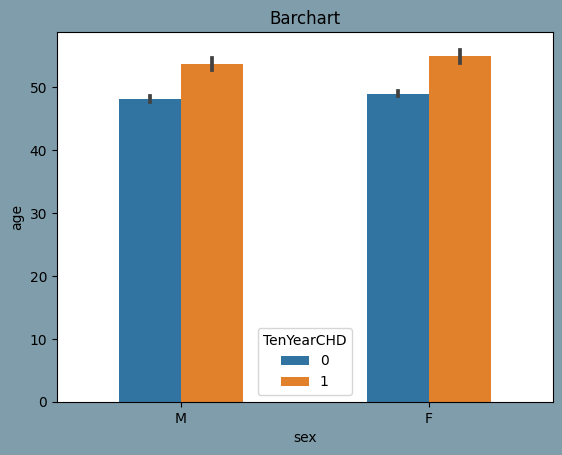

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(18,5))
plt.figure(facecolor='#809dab')
sns.barplot(data=df1 , x='sex' , y='age',hue= 'TenYearCHD', width= 0.5)
plt.title('Barchart')
plt.xlabel('sex')
plt.ylabel('age')

##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between age and target variable taking hue as sex**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found in this chart is that the males and females having age more then 50 has the high risk of CHD**

#### Chart - 8

Text(0, 0.5, 'cigsPerDay')

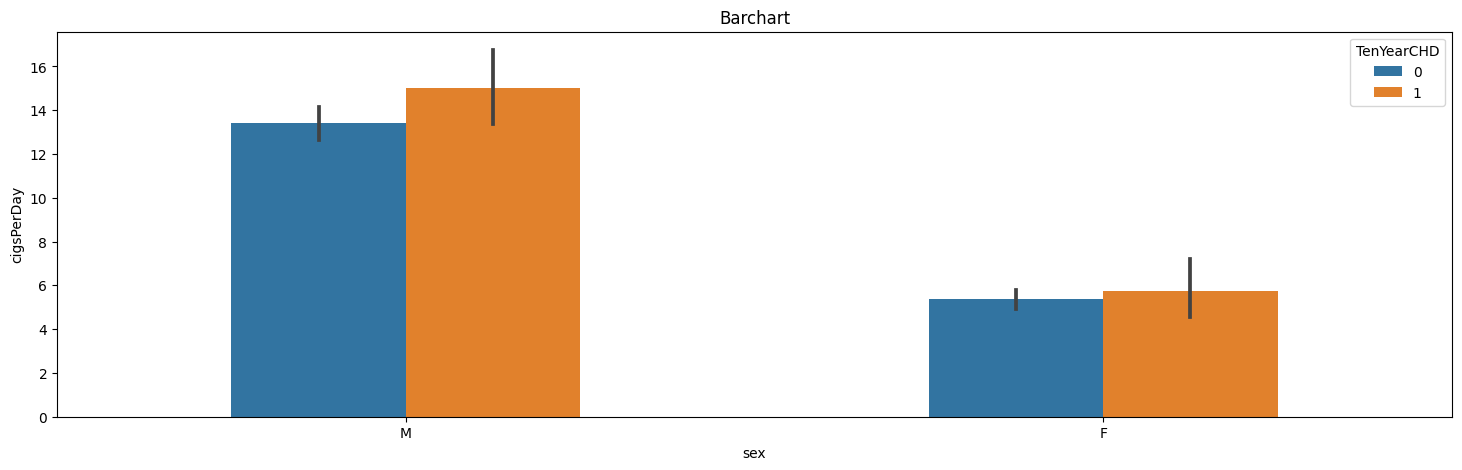

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(18,5))
sns.barplot(data=df1, x= 'sex', y='cigsPerDay', hue='TenYearCHD', width= 0.5)
plt.title('Barchart')
plt.xlabel('sex')
plt.ylabel('cigsPerDay')

##### 1. Why did you pick the specific chart?

**I used bar plot here to check the relation between sex and no of cigs per day taking hue as target variable**

##### 2. What is/are the insight(s) found from the chart?

**I can visualize that female smokers are very less as compared to male smokers,male smoker who smoker more than 13 cigs per day had more risk of CHD where as female smoker who smokes more than 5 cigs per day has more cigs has more risk of CHD**

Answer Here

#### Chart - 9

Text(0, 0.5, 'HeartRate')

<Figure size 1800x800 with 0 Axes>

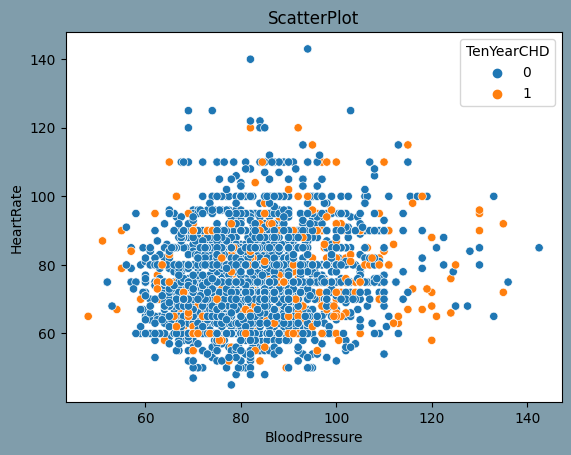

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(18,8))
plt.figure(facecolor='#809dab')
sns.scatterplot(x=df1['diaBP'], y=df1['heartRate'], hue=df1['TenYearCHD'])
plt.title('ScatterPlot')
plt.xlabel('BloodPressure')
plt.ylabel('HeartRate')

##### 1. Why did you pick the specific chart?

**i have used this scatterplot to see how scatter the data of bloodpressure and heartrate feature are with respect to each other and with the target variable**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found from this chart is that the blood pressure and heart rate are slightly Linear which means that increase in blood pressure will increase the heart Rate which ultimately increases risk of CHD**

#### Chart - 10

Text(0, 0.5, 'HeartRate')

<Figure size 1800x800 with 0 Axes>

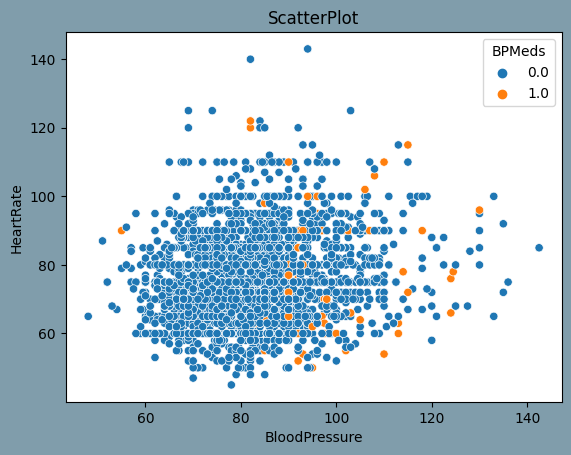

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(18,8))
plt.figure(facecolor='#809dab')
sns.scatterplot(x=df1['diaBP'], y=df1['heartRate'], hue=df1['BPMeds'])
plt.title('ScatterPlot')
plt.xlabel('BloodPressure')
plt.ylabel('HeartRate')

##### 1. Why did you pick the specific chart?

**i have used this scatterplot to see how scatter the data of bloodpressure and heart rate feature are with respect to each other and with BPMeds column**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found from this chart is that the blood pressure and heart rate are slightly Linear and the data points of peopls consuming BP medicines are more than the one's who are not consuming**

#### Chart - 11

Text(0, 0.5, 'BMI')

<Figure size 1800x800 with 0 Axes>

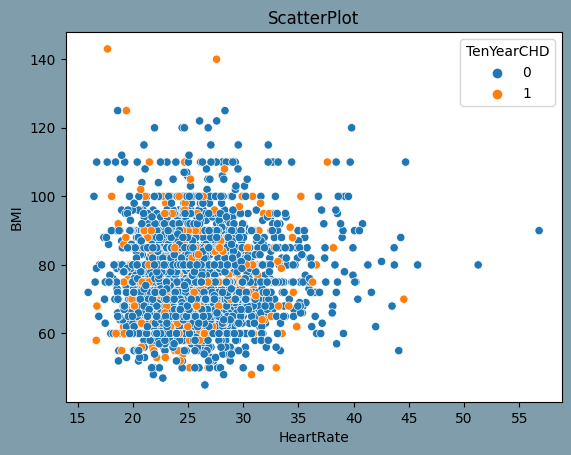

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(18,8))
plt.figure(facecolor='#809dab')
sns.scatterplot(x=df1['BMI'], y=df1['heartRate'],hue= df['TenYearCHD'])
plt.title('ScatterPlot')
plt.xlabel('HeartRate')
plt.ylabel('BMI')

##### 1. Why did you pick the specific chart?

**i have used this scatterplot to see how scatter the data of BMi and heart rate feature are with respect to each other and with Target Columns**

##### 2. What is/are the insight(s) found from the chart?

**The insights i have found from this chart is that the BMI and heart rate are not Linear**

In [ ]:
df1.columns

Index(['index', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Chart - 12

Text(0.5, 1.0, 'BoxPlot')

<Figure size 1800x800 with 0 Axes>

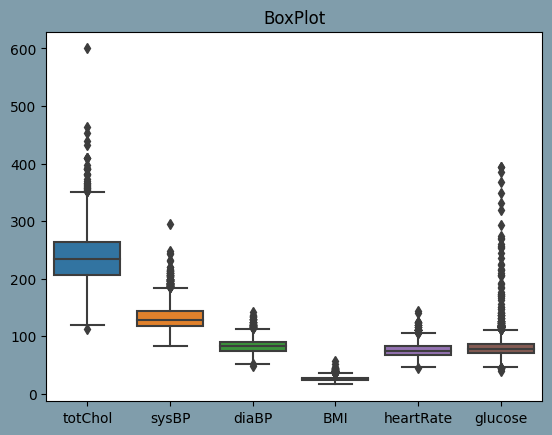

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(18,8))
plt.figure(facecolor='#809dab')
sns.boxplot(df1[['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']])
plt.title('BoxPlot')

##### 1. Why did you pick the specific chart?

**I have used this chart to visualise the outliers present in the features**

##### 2. What is/are the insight(s) found from the chart?

**I have found that the outliers present in the glucouse feature are in great numbers as compared to other features**

#### Chart - 14 - Correlation Heatmap

<ipython-input-32-bda47edfd5f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df1.corr()


<Axes: >

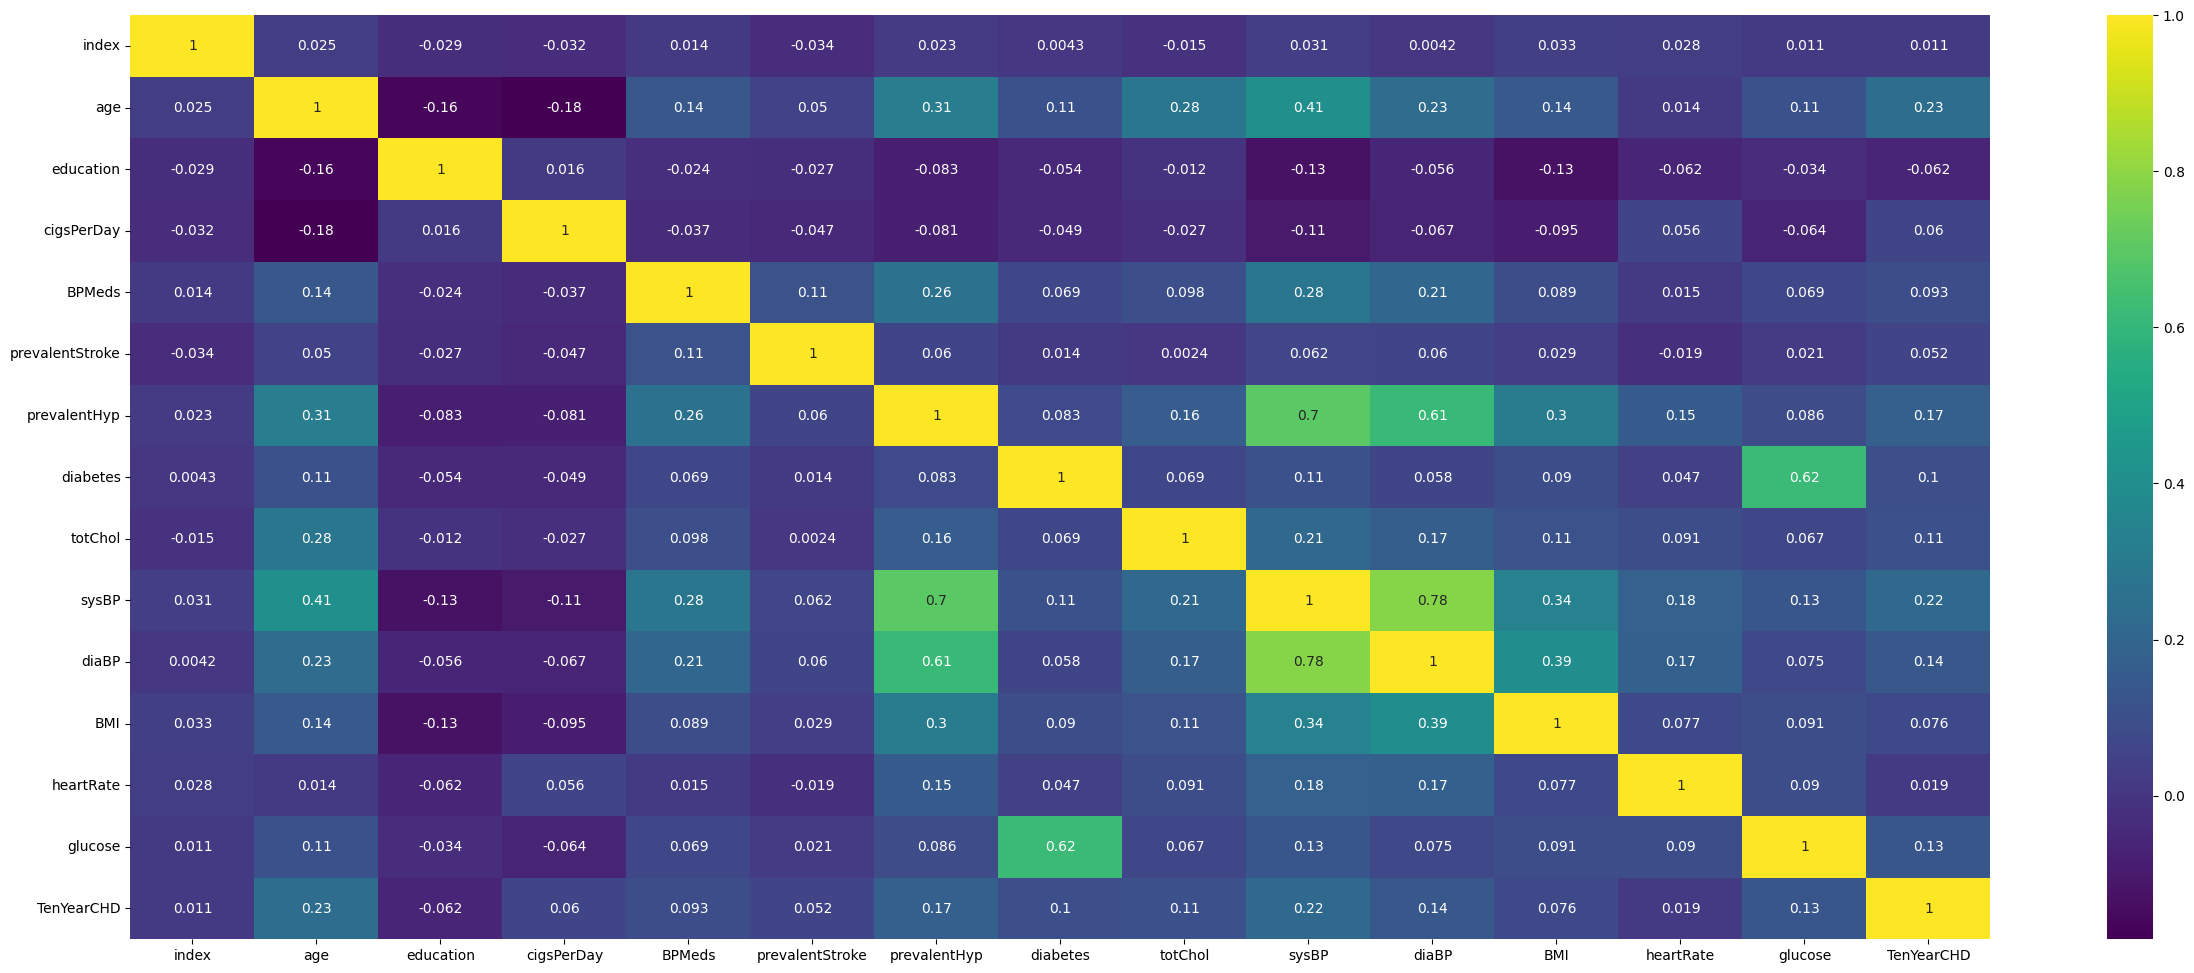

In [ ]:
# Correlation Heatmap visualization code
correlation=df1.corr()
plt.figure(figsize=(30,12))
sns.heatmap(correlation,annot=True,cmap='viridis')

##### 1. Why did you pick the specific chart?

**I have used this heatmap to see how the features are correlated with each other**

#### Chart - 15 - Pair Plot

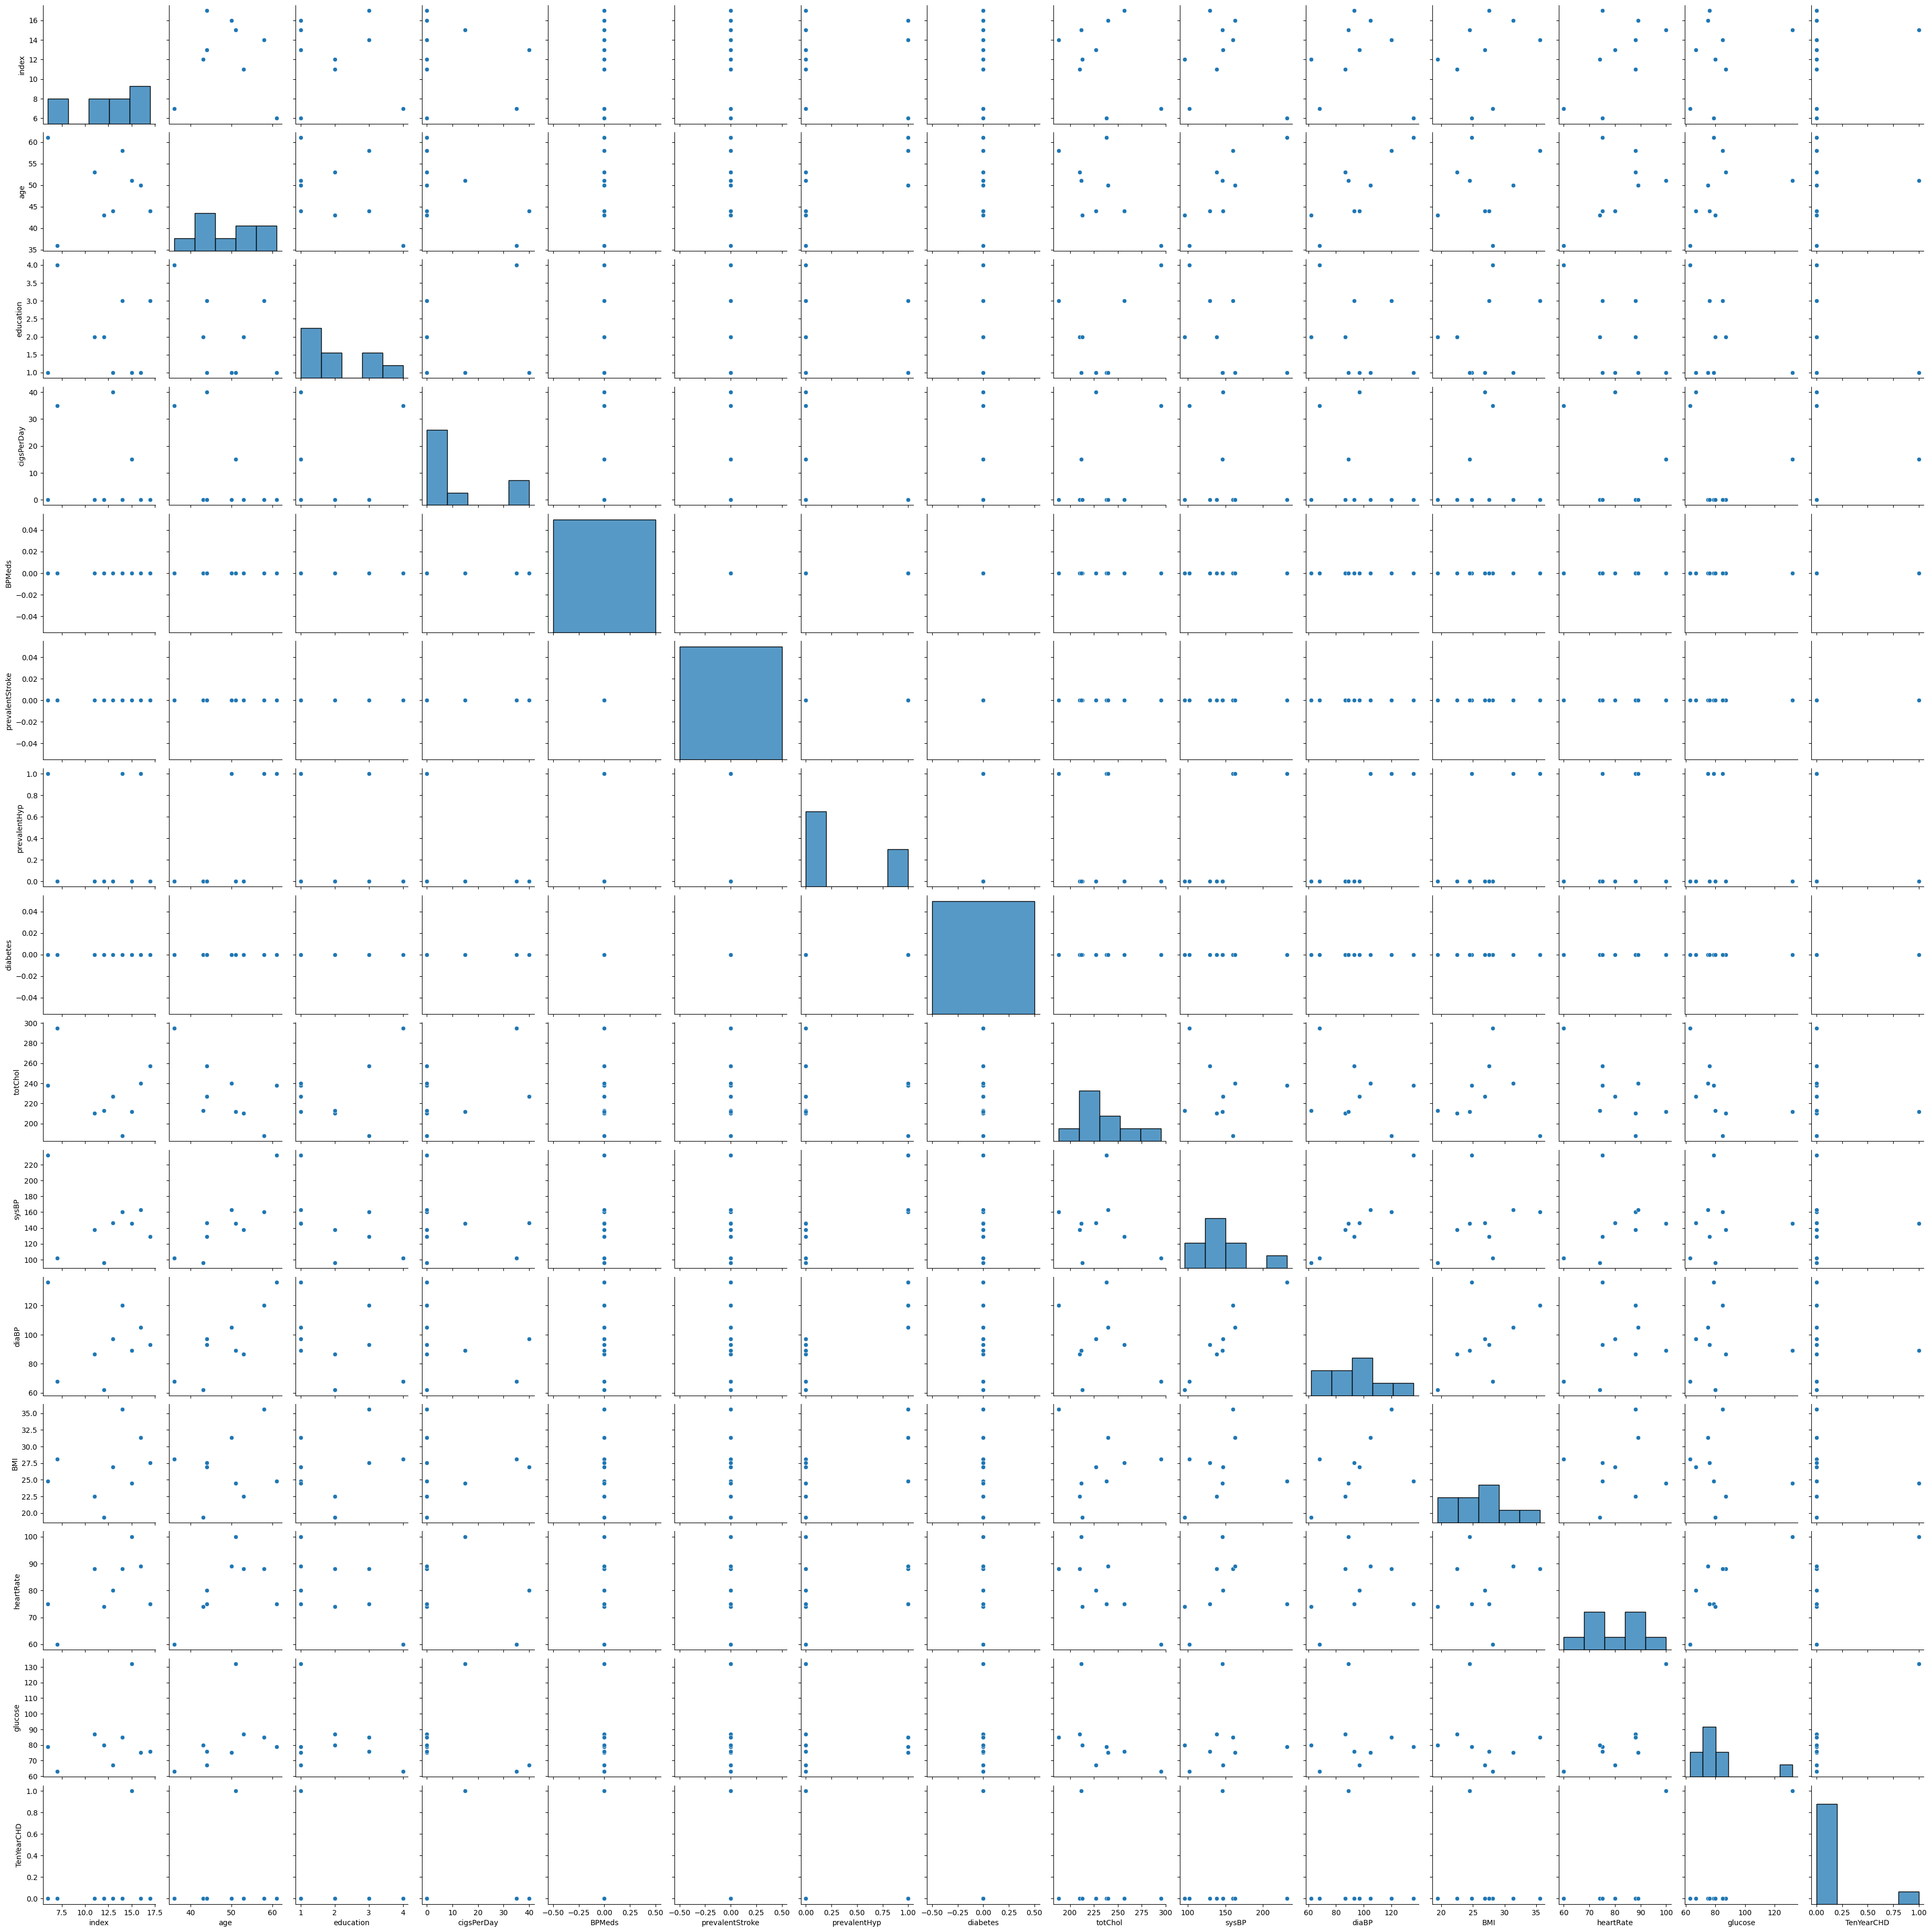

In [ ]:
# Pair Plot visualization code
sns.pairplot(df1[5:14])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Since  very few values were missing thus no need to  impute missing values as i have dropped the null values**

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5)
predictions = lof.fit_predict(df1[['totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']])
lof_index=np.where(predictions<0)
lof_index[0]

array([  16,   66,  113,  206,  281,  286,  368,  374,  476,  490,  547,
        604,  629,  671,  682,  686,  725,  773,  828,  831,  920, 1007,
       1052, 1105, 1153, 1212, 1350, 1379, 1475, 1480, 1510, 1558, 1564,
       1577, 1582, 1584, 1669, 1672, 1678, 1690, 1714, 1752, 1779, 1806,
       1807, 1816, 1856, 1886, 1960, 2000, 2080, 2205, 2349, 2468, 2533,
       2594, 2675, 2789, 2884])

In [ ]:
new_df=df1.drop(index=lof_index[0])
new_df

,index,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
2923,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
2924,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
2925,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


##### What all outlier treatment techniques have you used and why did you use those techniques?

**I have used local outlier factor technique to detect and remove the local outliers from the dataset**   

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
le = LabelEncoder()
new_df['sex']= le.fit_transform(new_df['sex'])
new_df['is_smoking']= le.fit_transform(new_df['is_smoking'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

**I had 2 columns which where categorical columns which were sex and is smoking column.so i used label encoder to encode them the dataframe**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<ipython-input-37-4f8b0653b12e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df1.corr()


<Axes: >

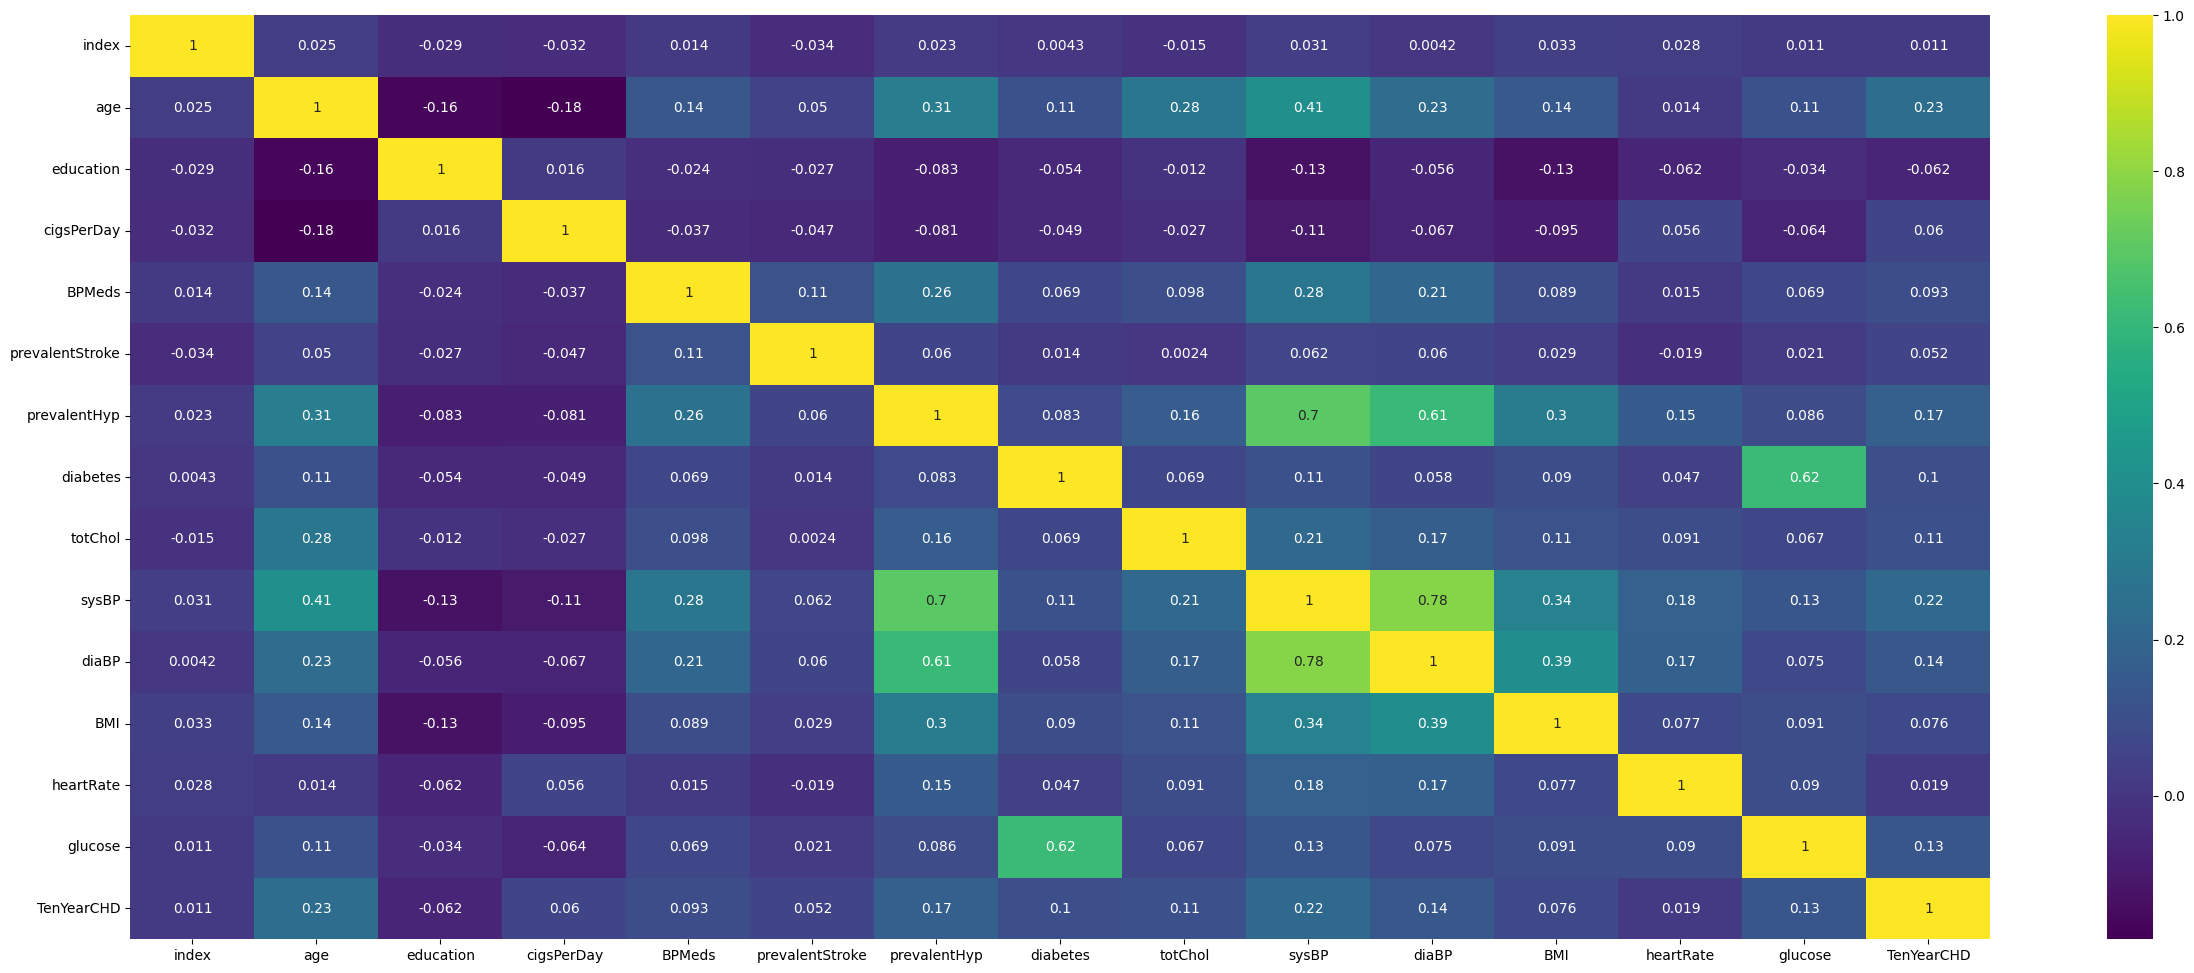

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
correlation=df1.corr()
plt.figure(figsize=(30,12))
sns.heatmap(correlation,annot=True,cmap='viridis')

**Since there were no  high multicollinearity found within the independant variable there was no need to manipulate or drop any feature**

### 5. Handling Imbalanced Dataset

In [ ]:
new_df['TenYearCHD'].value_counts()

0    2447
1     421
Name: TenYearCHD, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

**Yes the dataset is imbalanced as we can see that the target variable consist only 421 CHD cases out of 2868 records.**

In [ ]:
# Handling Imbalanced Dataset (If needed)
x=new_df.drop('TenYearCHD',axis=1)
y=new_df['TenYearCHD']
sm= SMOTETomek()
sx,sy=sm.fit_resample(x,y)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**I have used SMOTETomek technique to solve the imbalance dataset problem as SMOTETomek uses combination of undersampling and oversampling techniques of the majority samples and minority samples**

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sx, sy, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

**We have used 80:20 split ratio with respect to train and test data.**

### 6. Data Scaling

In [ ]:
# Scaling your data
ss=StandardScaler()
X_train=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(ss.transform(X_test),columns=X_test.columns)
print(X_train.shape)
print(X_test.shape)

(3852, 16)
(964, 16)


##### Which method have you used to scale you data and why?

**I have used Standardization method to scale the data**

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
m1=LogisticRegression()

# Fit the Algorithm
m1.fit(X_train,y_train)

# Predict on the model
pred_m1=m1.predict(X_test)
pred_m1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
accuracy=accuracy_score(y_test, pred_m1)
accuracy

0.733402489626556

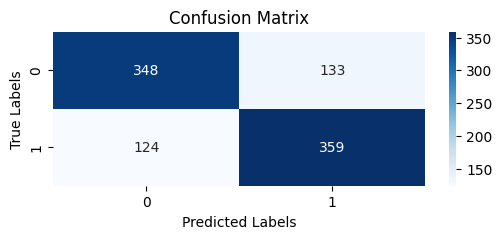

In [ ]:
cm = confusion_matrix(y_test, pred_m1)
plt.figure(figsize=(6, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, pred_m1))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       481
           1       0.73      0.74      0.74       483

    accuracy                           0.73       964
   macro avg       0.73      0.73      0.73       964
weighted avg       0.73      0.73      0.73       964



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
warnings.filterwarnings("ignore",category=FutureWarning)

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid= {'C': [0.001, 0.01, 0.1], 'penalty':['l1','l2','elasticnet']}

gs=GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the Algorithm
gs.fit(X_train,y_train)

# Predict on the model
print('Best parameters',gs.best_params_)
pred=gs.predict(X_test)

Best parameters {'C': 0.1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
# Visualizing evaluation Metric Score chart
gs_acc=accuracy_score(y_test, pred)
gs_acc

0.7344398340248963

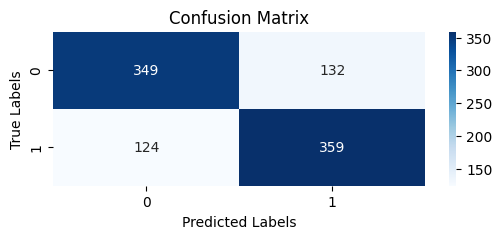

In [ ]:
gs_cm= confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 2))
sns.heatmap(gs_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       481
           1       0.73      0.74      0.74       483

    accuracy                           0.73       964
   macro avg       0.73      0.73      0.73       964
weighted avg       0.73      0.73      0.73       964



##### Which hyperparameter optimization technique have you used and why?

**I have used gridsearchcv with cross validation to select best parameter from all possible assumed parameters**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**After hyperparamter tuning, the accuracy percentage was increased by 1 perecent**

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_pred=rfc.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
rfc_acc=accuracy_score(y_test, rfc_pred)
rfc_acc*100

89.83402489626556

<Figure size 600x200 with 0 Axes>

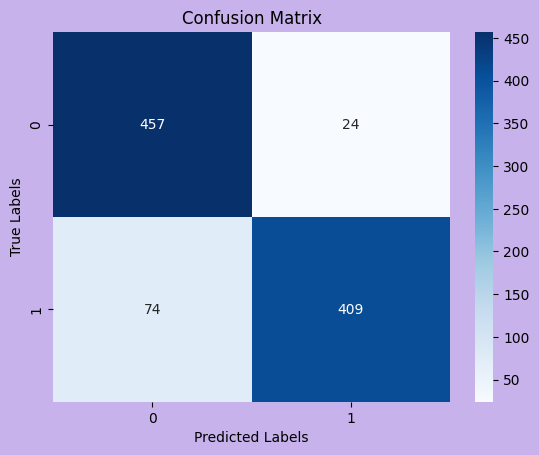

In [ ]:
rfc_cm= confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(6, 2))
plt.figure(facecolor='#c7b2eb')
sns.heatmap(rfc_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       481
           1       0.94      0.85      0.89       483

    accuracy                           0.90       964
   macro avg       0.90      0.90      0.90       964
weighted avg       0.90      0.90      0.90       964



#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter={'n_estimators':[200,500,2000,4000],'max_depth':[2,8,None]}

rfgsv=GridSearchCV(rfc,param_grid=parameter,cv=5,n_jobs=-1)

# Fit the Algorithm
rfgsv.fit(X_train, y_train)
print('Best parameters',rfgsv.best_params_)

# Predict on the model
rf_pred=rfgsv.predict(X_test)


Best parameters {'max_depth': None, 'n_estimators': 500}
Best parameters {'max_depth': None, 'n_estimators': 500}


In [56]:
accuracy=accuracy_score(y_test,rf_pred)
accuracy*100

90.56016597510373

<Figure size 600x200 with 0 Axes>

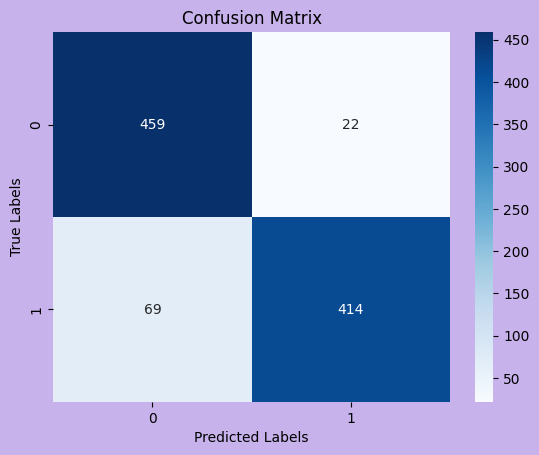

<Figure size 600x200 with 0 Axes>

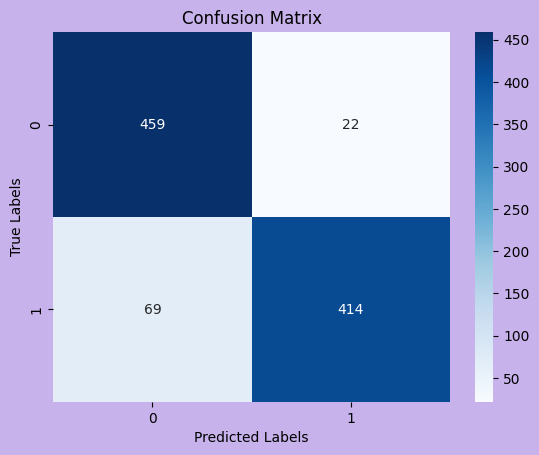

In [57]:
tunedrf_cm= confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 2))
plt.figure(facecolor='#c7b2eb')
sns.heatmap(tunedrf_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, rf_pred))

##### Which hyperparameter optimization technique have you used and why?

**I have used gridsearchcv with cross validation to select best parameter from all possible assumed parameters**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes there was 0.51 percentage increase in the accuracy as compared to random forest model**

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
xgb= XGBClassifier()

# Fit the Algorithm
xgb.fit(X_train,y_train)

# Predict on the model
xgb_pred=xgb.predict(X_test)
xgb_pred

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
xgb_acc=accuracy_score(y_test,xgb_pred)
xgb_acc*100

88.48547717842324

<Figure size 600x200 with 0 Axes>

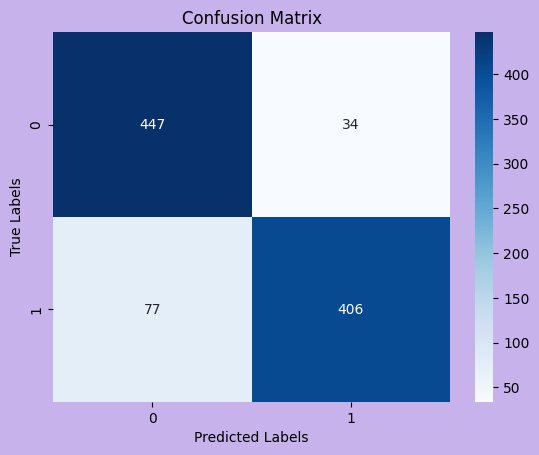

In [ ]:
xgb_cm= confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 2))
plt.figure(facecolor='#c7b2eb')
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       481
           1       0.92      0.84      0.88       483

    accuracy                           0.88       964
   macro avg       0.89      0.88      0.88       964
weighted avg       0.89      0.88      0.88       964



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}
xg_gsv=GridSearchCV(XGBClassifier(),param_grid,cv=5, n_jobs=-1)

# Fit the Algorithm
xg_gsv.fit(X_train,y_train)

print(xg_gsv.best_params_)

# Predict on the model
tuned_xgb_pred=xg_gsv.predict(X_test)
tuned_xgb_pred

In [ ]:
tuned_xgb_acc=accuracy_score(y_test,tuned_xgb_pred)
tuned_xgb_acc*100

In [ ]:
tuned_xgb_cm= confusion_matrix(y_test, tuned_xgb_pred)
plt.figure(figsize=(6, 2))
plt.figure(facecolor='#c7b2eb')
sns.heatmap(tuned_xgb_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**I have used gridsearchcv with cross validation to select best parameter from all possible assumed parameters**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**I have seen an improvment of 0.40% with respect to xg boost**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**I choose Random Forest classifier with hyperparameter tuning as my final prediction model which has an accuracy score of 90.85%**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**After training the dataset with 3 models namely logistic regression , random forest and xgboost including hyperparameter tuning, I came across the conclusion that my model performs best with the random forest classifier(tuned hyperparameter) with an accuracy of 90.85%. The performance of Logistic regression was very poor with an accuracy of just 70% and after hyperparameter tuning it just increased with 1%**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***